
Name: Rahmani Dibansa

Date: 23rd of August 2022

Description:
    This will contain the program for the extra points in Lecture 2 where the task is to build a model for
    predicting sine(x)
    
Reference(s):
    ACMSIGGRAPH. SIGGRAPH Now | Hands-on Workshop: Machine Learning and Neural Networks – Lecture 2
    Retrieved from: https://www.youtube.com/watch?v=bs2dgoeNrkQ&list=PLUPhVMQuDB_b2kcOooEduedthcBH53mvC&index=2


In [1]:
#---------- Importing Packages 
# Import packages and use tensorflow version 2.x
#%tensorflow_version 2.x
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import math

print(tf.__version__)

import tensorflow_addons as tfa

#----------DATA READING 
#  Generate a list of random numbers using numpy
# I will be using 17000 random data points
randData = 10.0 * np.random.rand(20000)
randData = pd.DataFrame( data= randData )
print(randData)


print( "\n======================================================================\n" )
#----------DATA CLEANUP 
# Drop the data points that are not valid
# It removes either columns or rows that
# have missing values
# clean_data = randData.dropna() 

# Clean/normalize the data by using this simple
# operation where it takes the range of the data
# and subtract the minimum of each data point.
# Then, we divide it by the range.
# This operation will apply to every row on the
# data set
#norm_data = (clean_data-clean_data.min())/(clean_data.max()-clean_data.min()) 

# Describe the data
# After normalizing the data, the minimum and maximum should
# be within 0 and 1
# print(norm_data.describe())


# Additional comments regarding data cleanup
# So, in my earlier attempts for this task, I tried cleaning up the data
# But, that just destroys the curve
# In lecture 1, the process for making a model was highlighted.
# As such, I thought that Data Clean up is a necessary process

# Troubleshooting this simple problem took me a while

2.9.1
              0
0      9.913791
1      6.244843
2      4.766150
3      4.116598
4      8.571992
...         ...
19995  4.204375
19996  7.571350
19997  3.657182
19998  0.865090
19999  0.985639

[20000 rows x 1 columns]




In [60]:
#print(clean_data.describe())

In [2]:
print( "\n======================================================================\n" )
#----------TRAIN/TEST SPLIT
# Use 80% of the data as a sample
# and use the rest of the data for testing
x_train = randData.sample(frac=0.8)
x_test = randData.drop(x_train.index)

# Since the generated random numbers are the inputs/features (x)
# we don't need to further process the data, and could directly allocate it
# as x_train and x_test


# Ground truth
# Since there are no second columns, we will need to modify the data
# to extract the results (y)
y_train = x_train.apply(math.sin, axis=1)
y_test = x_test.apply(math.sin, axis=1)


# Display the transposed statistics of the x_train/ training data
print(' Training Data (x_train): \n', x_train.describe().transpose())

print( "\n======================================================================\n" )
# Display the transposed statistics of the t_train/ testing data
print(' Ground Truth (y_train): \n', y_train.describe().transpose())




 Training Data (x_train): 
      count     mean       std       min       25%     50%       75%       max
0  16000.0  4.99932  2.886565  0.000126  2.494888  5.0055  7.531514  9.999951


 Ground Truth (y_train): 
 count    16000.000000
mean         0.185068
std          0.667840
min         -1.000000
25%         -0.399878
50%          0.318791
75%          0.813558
max          1.000000
dtype: float64


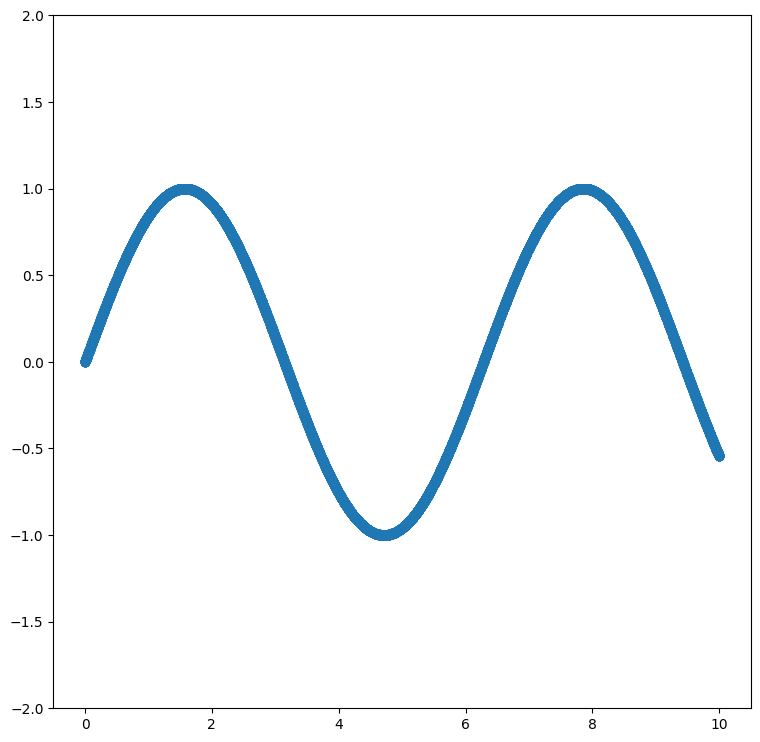

In [3]:
# Plot the sine curve
fig = plt.figure( figsize=( 9, 9))
plt.ylim([-2, 2])
plt.scatter(x_train, y_train)

In [4]:
# The number of train keys pertains to how many
# features are there in the training
print(" The number of train keys: ", len(x_train.keys()))

 The number of train keys:  1


In [5]:
#--------MODEL BUILDING
# Model Building: This is where we feed the features that we have
# to the learning algorithm so that we can build models.


# The number of parameters is how many features there are
# at the beginning
num_params = len(x_train.keys())
print(num_params)


# Use the keras package to train a sequential neural network
# To train the model for predicting sin functions, I made
# 1 input layer, 4 hidden layers( 2 32-nodes, and 2 21-nodes),
# and the output layer
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    tf.keras.layers.Dense(21, activation='relu', name="dense_03"),
    tf.keras.layers.Dense(21, activation='relu', name="dense_04"),
    tf.keras.layers.Dense(1, name="Output_Layer")
  ])


# learningRate pertains to how fast should we go down the gradients
# What kind of optimizer should be used is set as the learningRate
# For homework, I changed the learning rate from 0.001 to 0.01108
learning_rate = 0.001108

# Use the RMSprop which is a kind of algorithm used for gradient descent
# As for the loss function, use the Mean Square Error (mse)
# As for metrics, monitor the Mean Absolute Error (mae)
#
# The MAE is never negative and would be zero only if the prediction matched the ground truth perfectly. 
# It is an intuitive loss function and might also be used as one of your metrics, specifically for 
# regression problems, since you want to minimize the error in your predictions. (This is definition is taken from
# an article. Retrieved from: https://machinelearningmastery.com/loss-functions-in-tensorflow/#:~:text=The%20loss%20metric%20is%20very,with%20gradient%20descent%20and%20backpropagation.)
#
# As for MSE, it is similar to the mean absolute error as it also measures the deviation of the predicted value from the 
# ground truth value. However, the mean squared error squares this difference (always non-negative since squares of 
# real numbers are always non-negative), which gives it slightly different properties. One notable one is that the 
# mean squared error favors a large number of small errors over a small number of large errors, which leads to models 
# with fewer outliers or at least outliers that are less severe than models trained with a mean absolute error. 
# This is because a large error would have a significantly larger impact on the error and, consequently, the gradient 
# of the error when compared to a small error. (This is definition is taken from
# an article. Retrieved from: https://machinelearningmastery.com/loss-functions-in-tensorflow/#:~:text=The%20loss%20metric%20is%20very,with%20gradient%20descent%20and%20backpropagation.)
#
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              # loss function to minimize
              loss='mse',
              # list of metrics to monitor
              metrics=['mae',])



# Show the summary of the model that was trained
model.summary()

1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_01 (Dense)            (None, 32)                64        
                                                                 
 dense_02 (Dense)            (None, 32)                1056      
                                                                 
 dense_03 (Dense)            (None, 21)                693       
                                                                 
 dense_04 (Dense)            (None, 21)                462       
                                                                 
 Output_Layer (Dense)        (None, 1)                 22        
                                                                 
Total params: 2,297
Trainable params: 2,297
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Fit/Train model on training data
# x train: These are the inputs
# y train: This is the ground truth/ result
# batch size: it is the number of parts on which the data will be partitioned.
#             This is so that the model can train in different batches.
# epochs: this is the number of times to which the entirety of the training data
#         will be use. Basically, how many times the model will train on a given training data.
# validation split: since the model will train in batches, we will need to reserve 20% of the
#                   training data of each batch for validation.
# verbose: If you want to see the progress bar during training, set this to either 1 or 2.
#          On the contrary, if you don't want to, then set it as 0
#
# To train the model, I used 17 batches ( So that should mean there are 753 data points used for each batch),
# and I used 8 epochs
history = model.fit(x_train, y_train,
                    batch_size=17,
                    epochs=8,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/8
753/753 [==============================] - 12s 12ms/step - loss: 0.2401 - mae: 0.3691 - val_loss: 0.1103 - val_mae: 0.2061
Epoch 2/8
753/753 [==============================] - 6s 8ms/step - loss: 0.0542 - mae: 0.1385 - val_loss: 0.0138 - val_mae: 0.0756
Epoch 3/8
753/753 [==============================] - 4s 6ms/step - loss: 0.0162 - mae: 0.0724 - val_loss: 0.0097 - val_mae: 0.0599
Epoch 4/8
753/753 [==============================] - 4s 6ms/step - loss: 0.0126 - mae: 0.0633 - val_loss: 0.0027 - val_mae: 0.0361
Epoch 5/8
753/753 [==============================] - 4s 6ms/step - loss: 0.0104 - mae: 0.0571 - val_loss: 0.0049 - val_mae: 0.0594
Epoch 6/8
753/753 [==============================] - 4s 6ms/step - loss: 0.0091 - mae: 0.0539 - val_loss: 0.0016 - val_mae: 0.0334
Epoch 7/8
753/753 [==============================] - 5s 7ms/step - loss: 0.0079 - mae: 0.0520 - val_loss: 7.1397e-04 - val_mae: 0.0194
Epoch 8/8
753/753 [==============================] - 5s 6ms/step - loss: 0.00

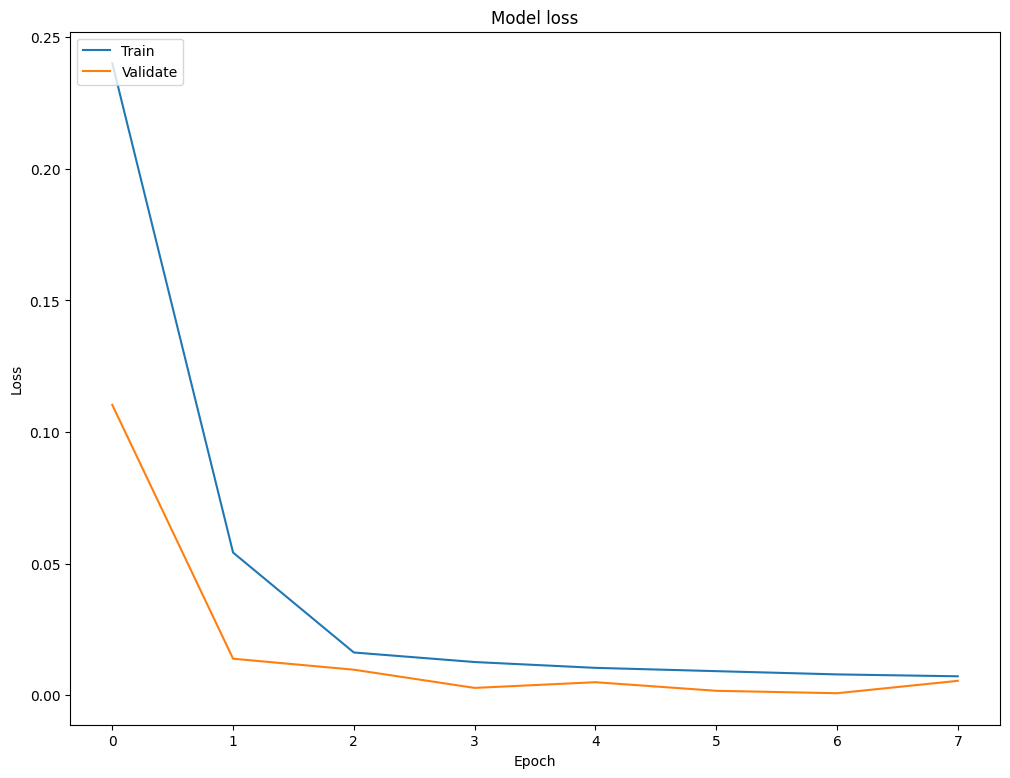

In [7]:
#--------MONITOR
# Plot training & validation loss values
fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [8]:
#--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)

125/125 - 0s - loss: 0.0056 - mae: 0.0454 - 437ms/epoch - 3ms/step
Loss: 0.005610776133835316 MAE: 0.045362215489149094


In [9]:
#--------PREDICT
# Use the model to predict
p_test = model.predict(x_test)

125/125 [==============================] - 1s 4ms/step


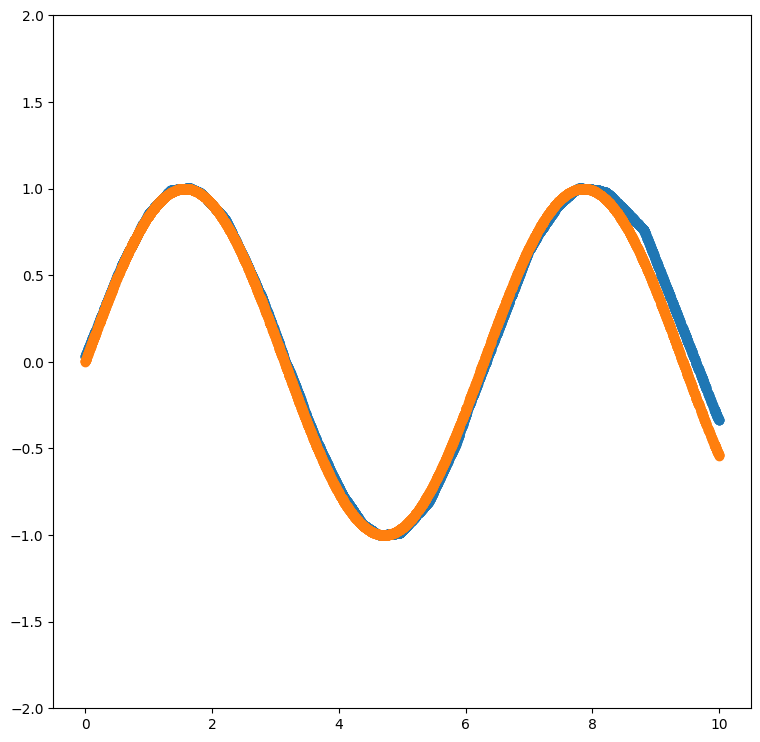

In [10]:
#--------PLOT THE SIN CURVE
fig = plt.figure( figsize= (9,9))
plt.ylim( [-2, 2] )

plt.scatter( x_test, p_test )
plt.scatter( x_test, y_test)


# Additional Comment:
# Even though the model was train for 8 epochs, the prediction
# seems good enough

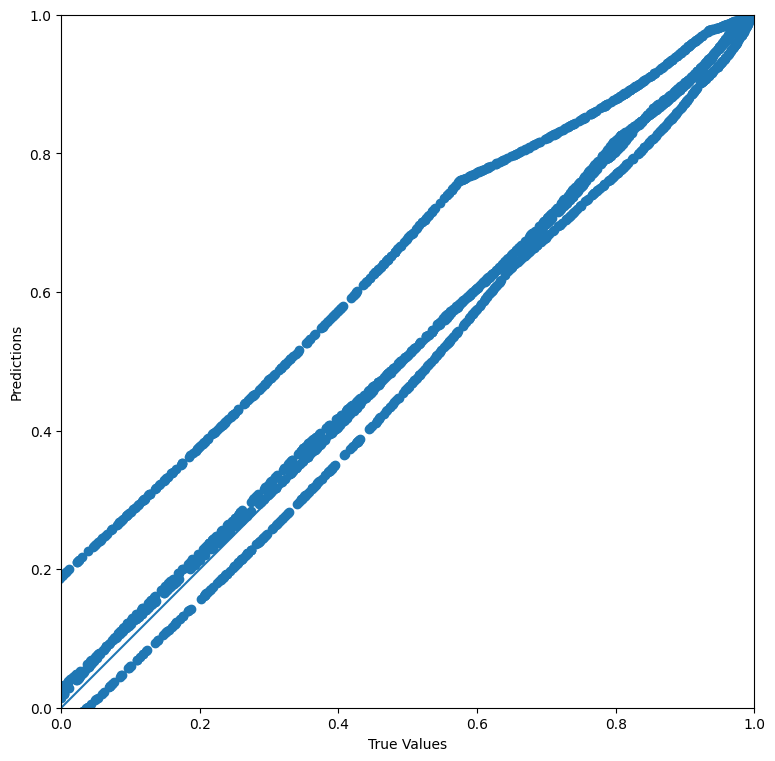

In [11]:
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

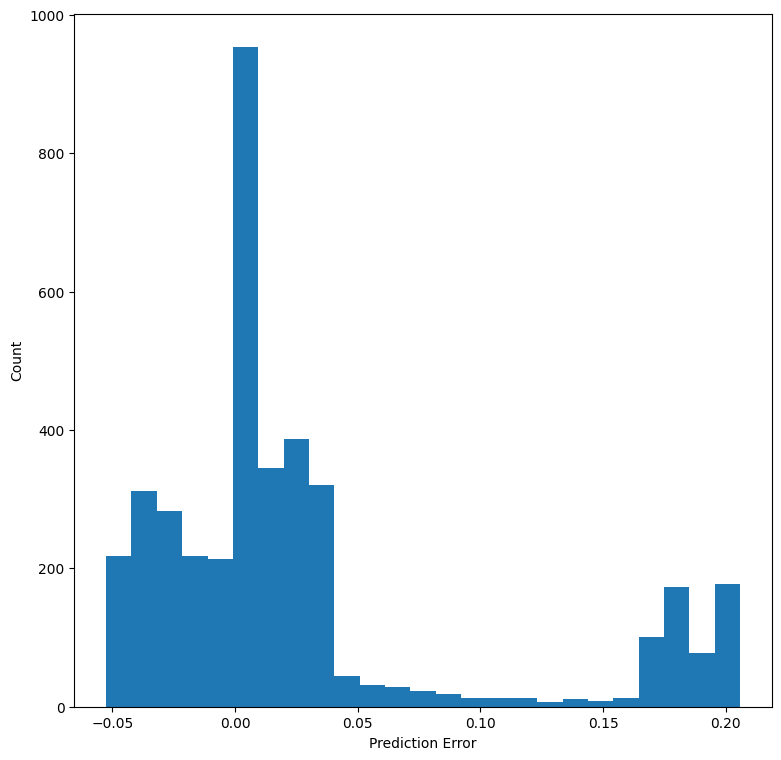

In [12]:
#---------PLOT the distribution of errors
fig = plt.figure(figsize=(9,9))
error = p_test.flatten() - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()